In [2]:
import pandas as pd
import numpy as np
import matplotlib as pt
import os
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = 20, 8
import plotly.graph_objs as go
import chart_studio.plotly
from pandas.plotting import autocorrelation_plot
import seaborn as sns
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.api as sm
from pmdarima.arima import auto_arima
from pandas import DataFrame

In [3]:
df_Vadhvan=pd.read_csv("Vadhvan.csv")

In [4]:
required_data = df_Vadhvan[['Modal_Price','Arrival_Date','Tons']]
required_data.index = required_data['Arrival_Date']
required_data.index=pd.DatetimeIndex(required_data.index)
required_data=required_data.drop("Arrival_Date",axis=1)
required_data['Modal_Price'] = required_data['Modal_Price'].map(lambda x: float(x))
required_data = required_data.fillna(required_data.bfill())
prices=required_data['Modal_Price']
idx = pd.period_range(start=min(df_Vadhvan.Arrival_Date), end=max(df_Vadhvan.Arrival_Date),freq="D")
required_data.index=required_data.index.to_period("D")
required_data=required_data.reindex(idx, method='ffill')

In [5]:
df_log = np.log(required_data)

In [6]:
train_data, test_data = df_log[3:int(len(df_log)*0.95)],df_log[int(len(df_log)*0.95):]

In [7]:
endog1=train_data[["Modal_Price"]]
endog1=pd.Series(endog1.Modal_Price.values,index=endog1.index)
endog1=endog1.dropna()

In [8]:
exog1=train_data[["Tons"]]
exog1=pd.Series(exog1.Tons.values,index=exog1.index)
exog1=exog1.dropna()

In [9]:
mod = sm.tsa.arima.ARIMA(endog=endog1,exog=exog1, order=(1, 1, 1), seasonal_order=(1, 1, 0, 365))
res = mod.fit(method='innovations_mle', low_memory=True, cov_type='none')

In [10]:
tons=sm.tsa.arima.ARIMA(required_data.Tons, order=(1, 1, 1), seasonal_order=(1, 1, 0, 365))
Tons = tons.fit(method='innovations_mle', low_memory=True, cov_type='none')
Tons_for_forecast=Tons.forecast(30)

In [11]:
endog2=test_data[["Modal_Price"]]
endog2=pd.Series(endog2.Modal_Price.values,index=endog2.index)
endog2=endog2.dropna()
exog2=test_data[["Tons"]]
exog2=pd.Series(exog2.Tons.values,index=exog2.index)
exog2=exog2.dropna()

In [12]:
Forecast=res.forecast(steps=test_data.shape[0],exog=exog2)

In [13]:
Forecast = DataFrame(Forecast,columns=['Forecast'])
Forecast = pd.DataFrame(Forecast)
Forecast.rename(columns = {0:'Forecast'}, inplace = True) 
Forecast.reset_index(drop=True)
idx1=pd.period_range(start=min(test_data.index), end=max(test_data.index),freq="D")
Forecast=Forecast.reindex(idx1, method='ffill')
Forecast

,Forecast
2019-11-12,7.939356
2019-11-13,7.939714
2019-11-14,7.803444
2019-11-15,7.722625
2019-11-16,7.918962
...,...
2020-09-22,7.837186
2020-09-23,7.840433
2020-09-24,7.827391
2020-09-25,7.866568


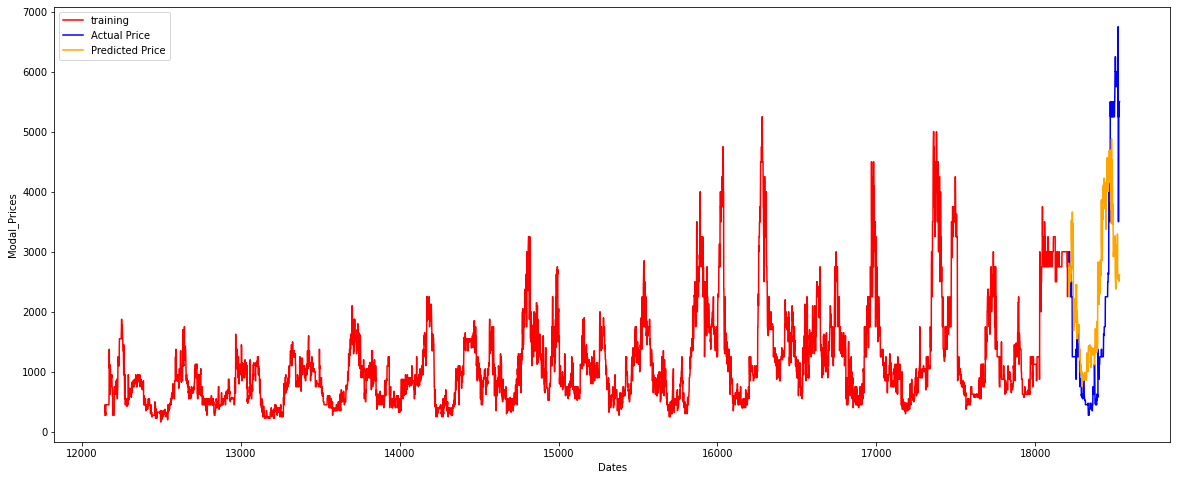

In [14]:
plt.plot(train_data.index,np.exp(train_data.Modal_Price), label='training',color='red')
plt.plot(test_data.index,np.exp(test_data.Modal_Price), color = 'blue', label='Actual Price')
plt.plot(Forecast.index,np.exp(Forecast.Forecast), color = 'orange',label='Predicted Price')
plt.xlabel('Dates')
plt.ylabel('Modal_Prices')
plt.legend()
plt.show()

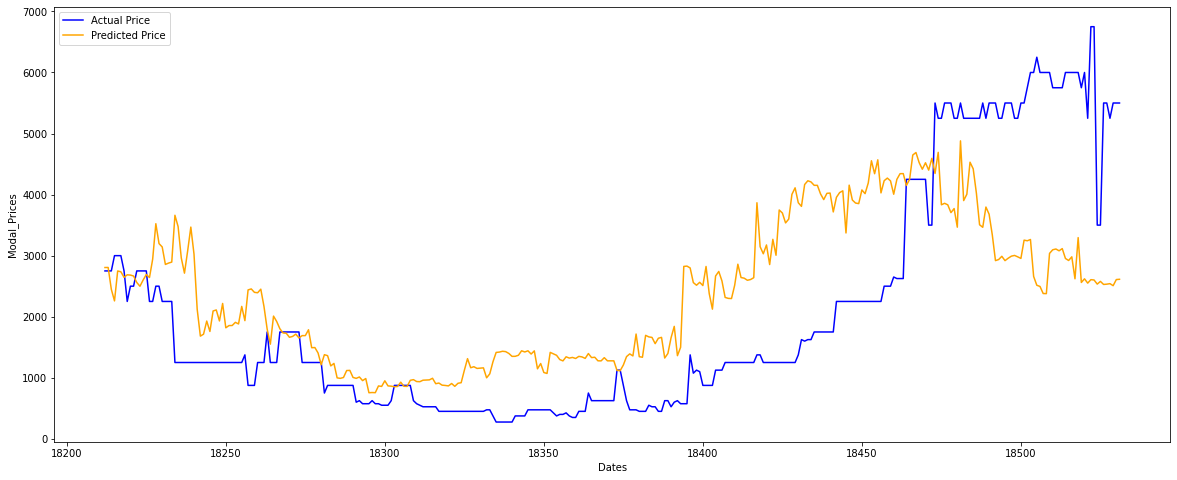

In [15]:
plt.plot(test_data.index,np.exp(test_data.Modal_Price), color = 'blue', label='Actual Price')
plt.plot(Forecast.index,np.exp(Forecast.Forecast), color = 'orange',label='Predicted Price')
plt.xlabel('Dates')
plt.ylabel('Modal_Prices')
plt.legend()
plt.show()

In [16]:
def mean_absolute_percentage_error(y_true, y_pred): 
        y_true, y_pred = np.array(y_true), np.array(y_pred)
        return( np.mean(np.abs((y_true - y_pred) / y_true)) * 100)
MAPE=mean_absolute_percentage_error(test_data.Modal_Price,Forecast.Forecast)
accuracy=100-MAPE
accuracy
MAPE

9.302013826333507

In [17]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse = sqrt(mean_squared_error(test_data.Modal_Price,Forecast.Forecast))
rmse

0.7439861313212566

In [18]:
endogf=df_log[["Modal_Price"]]
endogf=pd.Series(endogf.Modal_Price.values,index=endogf.index)
endogf=endogf.dropna()
exogf=df_log[["Tons"]]
exogf=pd.Series(exogf.Tons.values,index=exogf.index)
exogf=exogf.dropna()

In [19]:
mod1 = sm.tsa.arima.ARIMA(endog=endogf,exog=exogf, order=(1, 1, 1), seasonal_order=(1, 1, 0, 365))
res1 = mod1.fit(method='innovations_mle', low_memory=True, cov_type='none')

In [20]:
forecast1=res1.forecast(steps=30,exog=Tons_for_forecast)

In [21]:
Forecast1 = DataFrame(forecast1,columns=['Forecast'])
Forecast1.rename(columns = {0:'Forecast'}, inplace = True) 
Forecast1.reset_index(drop=True)

,Forecast
0,8.382856
1,8.107995
2,8.478497
3,8.528111
4,8.527705
5,8.391766
6,8.442992
7,8.420860
8,8.149868
9,8.149864


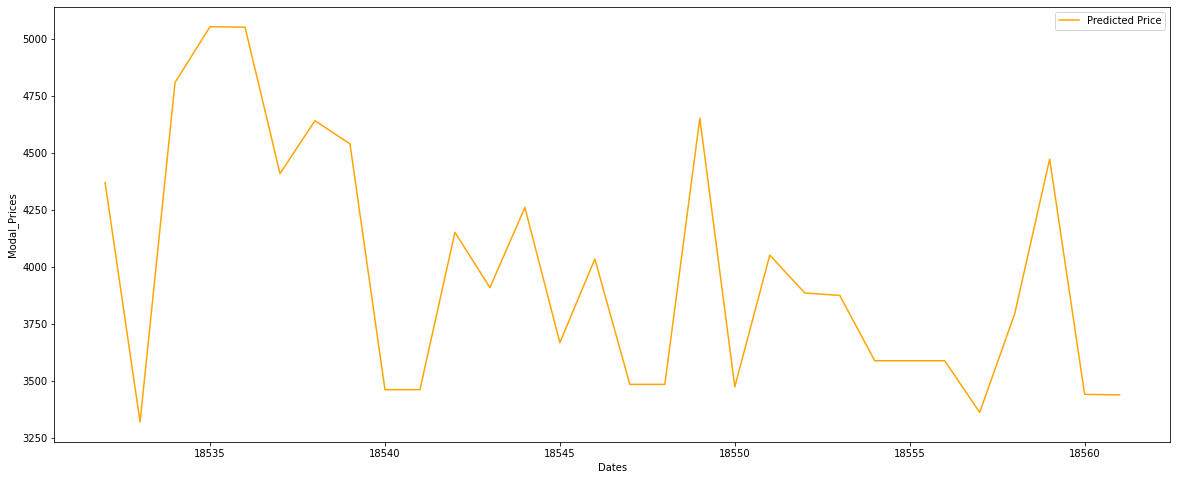

In [22]:
plt.plot(Forecast1.index,np.exp(Forecast1.Forecast), color = 'orange',label='Predicted Price')
plt.xlabel('Dates')
plt.ylabel('Modal_Prices')
plt.legend()
plt.show()